# Agents comparison

In [1]:
import os
while os.path.basename(os.getcwd()) != "MountainCar-RL":
    os.chdir('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from agents.data_processing import *

**PLOT: training episodes' reward**

In [2]:
df_heu_train = pd.read_csv('results/C_train_DQN_heuristic.csv')
df_RND_train = pd.read_csv('results/D_train_DQN_RND.csv')
df_Dyna_train = pd.read_csv('results/E_train_Dyna.csv')

n_episodes = len(df_heu_train.index)

env_rewards_heu = df_heu_train['env_reward'].to_numpy()
env_rewards_RND = df_RND_train['env_reward'].to_numpy()
env_rewards_Dyna = df_Dyna_train['reward'].to_numpy()

**PLOT: training episodes' reward (average window)**

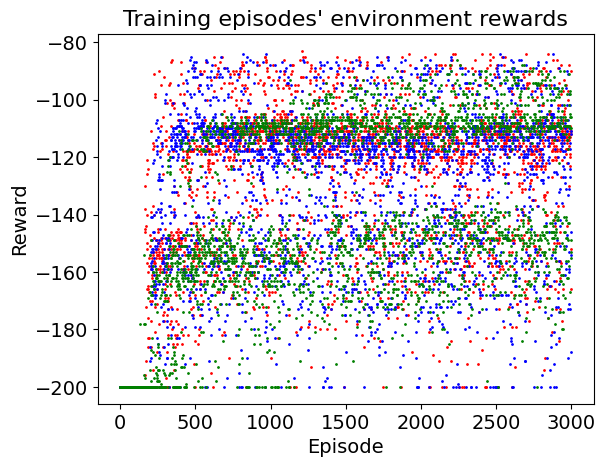

In [3]:
plt.scatter(range(n_episodes), env_rewards_heu, s=1, c='red', label="Environment reward", rasterized=True)
plt.scatter(range(n_episodes), env_rewards_RND, s=1, c='#0000ff', label="Heuristic reward", rasterized=True)
plt.scatter(range(n_episodes), env_rewards_Dyna, s=1, c='green', label="Total reward", rasterized=True)
plt.ylabel("Reward", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title("Training episodes' environment rewards", fontsize=16)
plt.savefig("plots/F_comparison_envReward.pdf", transparent=True, bbox_inches="tight", dpi=400)
plt.show()

**PLOT: training cumulative reward over episodes**

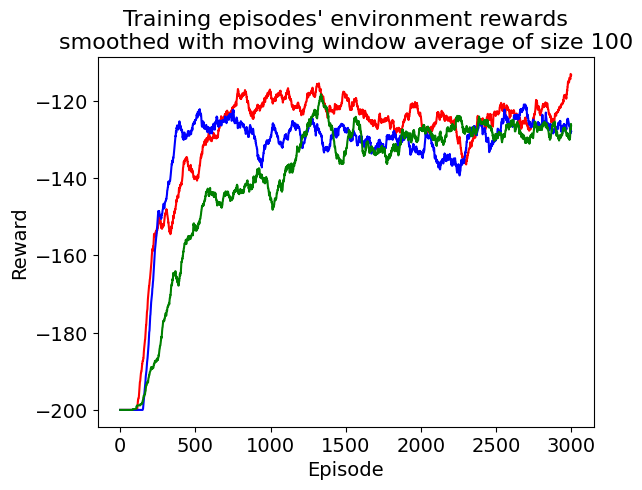

In [4]:
window_size = 100
plot_interval = 1
mask = [plot_interval*i for i in range(n_episodes//plot_interval)] + [n_episodes-1]

plt.plot(np.array(list(range(n_episodes)))[mask], moving_window_average(env_rewards_heu, window_size)[mask], "-", c='red', label="DQN with heuristic reward", rasterized=True)
plt.plot(np.array(list(range(n_episodes)))[mask], moving_window_average(env_rewards_RND, window_size)[mask], "-", c='#0000ff', label="DQN with RND reward", rasterized=True)
plt.plot(np.array(list(range(n_episodes)))[mask], moving_window_average(env_rewards_Dyna, window_size)[mask], "-", c='green', label="Dyna", rasterized=True)
plt.ylabel("Reward", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title(f"Training episodes' environment rewards\nsmoothed with moving window average of size {window_size}", fontsize=16)
plt.savefig("plots/F_comparison_envReward_avg.pdf", transparent=True, bbox_inches="tight", dpi=400)
plt.show()

**PLOT: training cumulative reward over episodes**

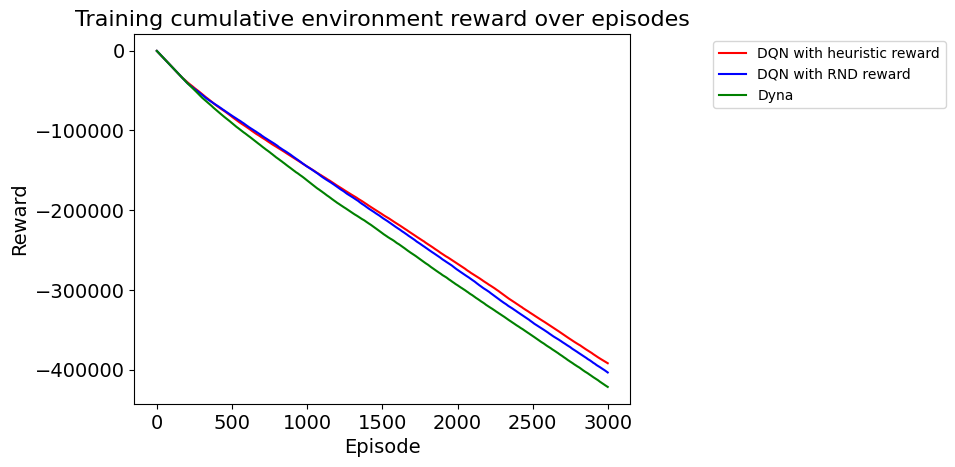

In [5]:
cum_rewards_heu = env_rewards_heu.cumsum()
cum_rewards_RND = env_rewards_RND.cumsum()
cum_rewards_Dyna = env_rewards_Dyna.cumsum()

plt.plot(range(n_episodes), cum_rewards_heu, '-', c='red', label="DQN with heuristic reward", rasterized=True)
plt.plot(range(n_episodes), cum_rewards_RND, '-', c='blue', label="DQN with RND reward", rasterized=True)
plt.plot(range(n_episodes), cum_rewards_Dyna, '-', c='green', label="Dyna", rasterized=True)
plt.ylabel("Reward", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title("Training cumulative environment reward over episodes", fontsize=16)
plt.legend(bbox_to_anchor=(1.65, 1), markerscale=3)
plt.savefig("plots/F_comparison_cumulativeEnvReward.pdf", transparent=True, bbox_inches="tight", dpi=400)
plt.show()

**PLOT: testing duration w.r.t initial position**

In [6]:
df_heu_test = pd.read_csv('results/C_test_DQN_heuristic.csv')
df_RND_test = pd.read_csv('results/D_test_DQN_RND.csv')
df_Dyna_test = pd.read_csv('results/E_test_Dyna.csv')

n_episodes = len(df_heu_test.index)
initial_xs = df_heu_test.sort_values(by='initial_x')['initial_x'].to_numpy()

durations_heu = df_heu_test.sort_values(by='initial_x')['duration'].to_numpy()
durations_RND = df_RND_test.sort_values(by='initial_x')['duration'].to_numpy()
durations_Dyna = df_Dyna_test.sort_values(by='initial_x')['duration'].to_numpy()

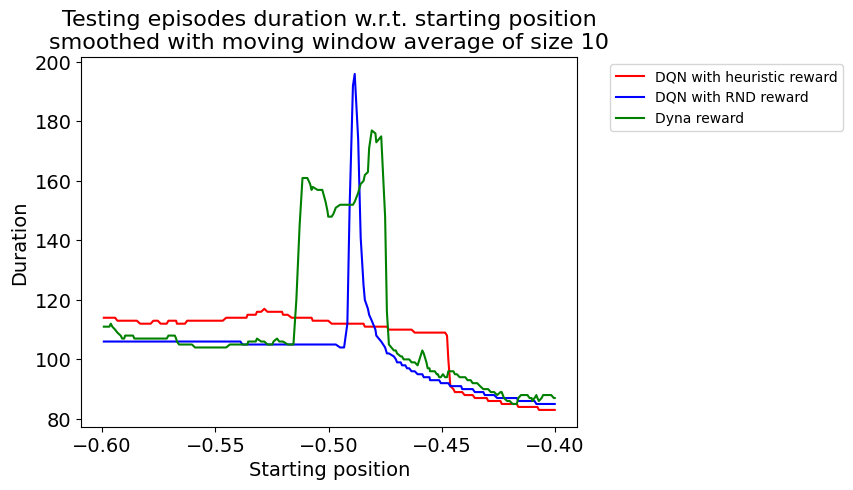

In [7]:
window_size = 10
plot_interval = 5
mask = [plot_interval*i for i in range(n_episodes//plot_interval)] + [n_episodes-1]

plt.plot(initial_xs[mask], moving_window_average(durations_heu, window_size)[mask], '-', c='red', label="DQN with heuristic reward", rasterized=True)
plt.plot(initial_xs[mask], moving_window_average(durations_RND, window_size)[mask], '-', c='blue', label="DQN with RND reward", rasterized=True)
plt.plot(initial_xs[mask], moving_window_average(durations_Dyna, window_size)[mask], '-', c='green', label="Dyna reward", rasterized=True)
plt.ylabel("Duration", fontsize=14)
plt.xlabel("Starting position", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title(f"Testing episodes duration w.r.t. starting position\nsmoothed with moving window average of size {window_size}", fontsize=16)
plt.legend(bbox_to_anchor=(1.55, 1), markerscale=3)
plt.savefig("plots/F_comparison_duration.pdf", transparent=True, bbox_inches="tight", dpi=400)
plt.show()

**PLOT: testing dutation over episodes (average window)**

In [8]:
df_heu_test = pd.read_csv('results/C_test_DQN_heuristic.csv')
df_RND_test = pd.read_csv('results/D_test_DQN_RND.csv')
df_Dyna_test = pd.read_csv('results/E_test_Dyna.csv')

n_episodes = len(df_heu_test.index)

durations_heu = df_heu_test['duration'].to_numpy()
durations_RND = df_RND_test['duration'].to_numpy()
durations_Dyna = df_Dyna_test['duration'].to_numpy()

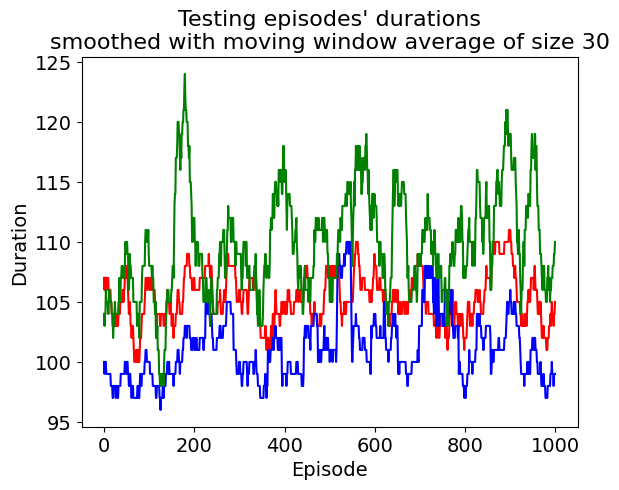

In [9]:
window_size = 30
plot_interval = 1
mask = [plot_interval*i for i in range(n_episodes//plot_interval)] + [n_episodes-1]

plt.plot(np.array(list(range(n_episodes)))[mask], moving_window_average(durations_heu, window_size)[mask], "-", c='red', label="DQN with heuristic reward", rasterized=True)
plt.plot(np.array(list(range(n_episodes)))[mask], moving_window_average(durations_RND, window_size)[mask], "-", c='#0000ff', label="DQN with RND reward", rasterized=True)
plt.plot(np.array(list(range(n_episodes)))[mask], moving_window_average(durations_Dyna, window_size)[mask], "-", c='green', label="Dyna", rasterized=True)
plt.ylabel("Duration", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title(f"Testing episodes' durations\nsmoothed with moving window average of size {window_size}", fontsize=16)
plt.savefig("plots/F_test_duration_avg.pdf", transparent=True, bbox_inches="tight", dpi=400)
plt.show()

**PLOT: testing cumulative dutation over episodes**

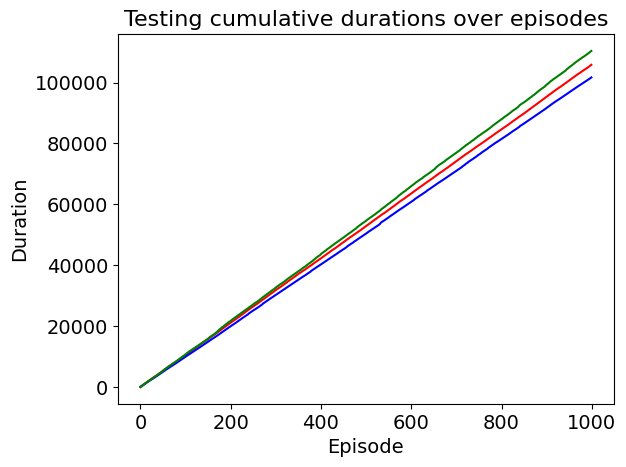

In [10]:
plt.plot(range(n_episodes), durations_heu.cumsum(), "-", c='red', label="DQN with heuristic reward", rasterized=True)
plt.plot(range(n_episodes), durations_RND.cumsum(), "-", c='#0000ff', label="DQN with RND reward", rasterized=True)
plt.plot(range(n_episodes), durations_Dyna.cumsum(), "-", c='green', label="Dyna", rasterized=True)
plt.ylabel("Duration", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title("Testing cumulative durations over episodes", fontsize=16)
plt.savefig("plots/F_test_cumulativeDuration.pdf", transparent=True, bbox_inches="tight", dpi=400)
plt.show()